<a href="https://colab.research.google.com/github/aenaghai/dep/blob/main/face_recg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import cv2
import numpy as np
import pandas as pd
import os # accessing directory structure
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [29]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!pip install -q kaggle
os.environ['KAGGLE_USERNAME'] = "aenaghai5"
os.environ['KAGGLE_KEY'] = "3e96f462e03063f3137e83401b19d220"
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import opendatasets as od
import pandas
od.download(
	"https://www.kaggle.com/datasets/chinafax/cfpw-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aenaghai5
Your Kaggle Key: ··········


100%|██████████| 81.6M/81.6M [00:01<00:00, 52.3MB/s]


In [32]:
folder='/content/drive/MyDrive/dataset'
width_img=224
height_img=224

In [33]:
from mtcnn import MTCNN
detector=MTCNN()

In [34]:
results=[]

In [35]:
img_dir=os.path.join(".", folder)

In [36]:
OriginalImages = []
UpsampledImages = []
labels=[]
lables_test=[]
OriginalImagesTest = []
d=[]
f=[]
y=0
j=0

for path, directories, files in os.walk('/content/cfpw-dataset/cfp-dataset/Data/Images'):
    y+=1
    i=0
    if(j>=20):
        break
    for fil in files:
        i+=1
        d.append(path)
        x=path
        f.append(fil)
        if(x[-7:]=="frontal"):
            if(i<=1):
                image = os.path.join(path, fil)
                OriginalImages.append( os.path.join(path, fil))
                j+=1
                labels.append(y)
            elif(i==2):
                image = os.path.join(path, fil)
                OriginalImagesTest.append( os.path.join(path, fil))
                lables_test.append(y)
                break
        else:
            break
        
print('Total images ', len(OriginalImages))

def displayImage(imagePath):
    image = mpimg.imread(imagePath)
    plt.imshow(image)
    print('Image path', imagePath)
    print('Image size -', image.shape)

Total images  20


In [37]:
OriginalImages

['/content/cfpw-dataset/cfp-dataset/Data/Images/021/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/004/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/086/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/284/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/370/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/041/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/137/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/228/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/288/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/202/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/449/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/485/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/092/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/175/frontal/07.jpg',
 '/content/cfpw-dataset/cfp-datase

In [38]:
from PIL import Image
import glob
image_list = []
for i in OriginalImages:
  for filename in glob.glob(i): 
      im=Image.open(filename)
      image_list.append(im)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


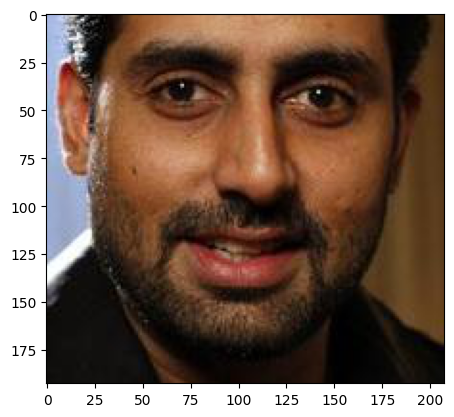

In [39]:
plt.imshow(image_list[1])
print(type(image_list[1]))

In [40]:
def detect_face(image):
    detector=MTCNN()
    bounds=detector.detect_faces(image)
    return bounds

In [41]:
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        x,y,w,h=box['box']
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

In [42]:
def mark_key_point(image, keypoint):
    cv2.circle(image, (keypoint), 1, (0,255,0), 2)

In [43]:
image = cv2.imread(OriginalImages[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = detect_face(image)
print("Output of MTCNN detector is...\n",bboxes)

1/1 [==============================] - 0s 226ms/step
Output of MTCNN detector is...
 [{'box': [41, 0, 143, 165], 'confidence': 0.9999656677246094, 'keypoints': {'left_eye': (82, 38), 'right_eye': (152, 48), 'nose': (115, 87), 'mouth_left': (78, 113), 'mouth_right': (134, 125)}}]


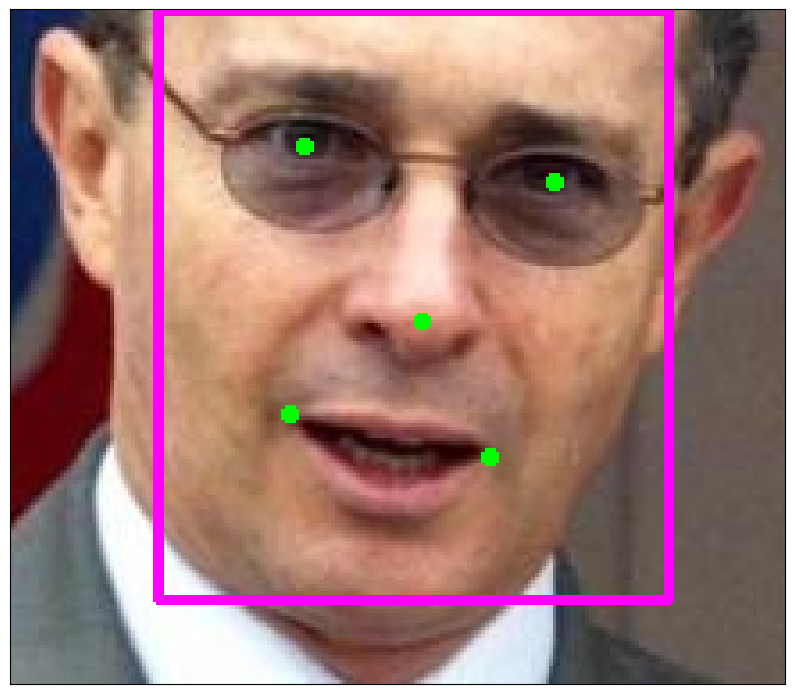

In [44]:
draw_bounding_boxes(image, bboxes)
mark_key_point(image, bboxes[0]['keypoints']['left_eye'])
mark_key_point(image, bboxes[0]['keypoints']['right_eye'])
mark_key_point(image, bboxes[0]['keypoints']['nose'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_left'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_right'])

# display the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [45]:
for i in range(len(OriginalImages)):
  image=cv2.imread(OriginalImages[i])
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  bboxes=detect_face(image)
  results.append(bboxes)
  print("Output of MTCNN detector is...\n",bboxes)

1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 171ms/step
Output of MTCNN detector is...
 [{'box': [41, 0, 143, 165], 'confidence': 0.9999656677246094, 'keypoints': {'left_eye': (82, 38), 'right_eye': (152, 48), 'nose': (115, 87), 'mouth_left': (78, 113), 'mouth_right': (134, 125)}}]
1/1 [==============================] - 0s 141ms/step
Output of MTCNN detector is...
 [{'box': [21, 0, 156, 172], 'confidence': 0.9987254738807678, 'keypoints': {'left_eye': (70, 38), 'right_eye': (144, 42), 'nose': (111, 90), 'mouth_left': (74, 119), 'mouth_right': (134, 123)}}]
1/1 [==============================] - 0s 158ms/step
Output of MTCNN detector is...
 [{'box': [12, 27, 99, 126], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (41, 73), 'right_eye': (87, 74), 'nose': (64, 95), 'mouth_left': (43, 121), 'mouth_right': (84, 120)}}]
1/1 [==============================] - 0s 151ms/step
Output of MTCNN detector is...
 [{'box': [34, 0, 135, 149], 'confidence': 0.9996986389160156, 'keypoints': {'l

In [46]:
results
#the 'box' defines the corners of the face, we need to extract that ^_^

[[{'box': [41, 0, 143, 165],
   'confidence': 0.9999656677246094,
   'keypoints': {'left_eye': (82, 38),
    'right_eye': (152, 48),
    'nose': (115, 87),
    'mouth_left': (78, 113),
    'mouth_right': (134, 125)}}],
 [{'box': [21, 0, 156, 172],
   'confidence': 0.9987254738807678,
   'keypoints': {'left_eye': (70, 38),
    'right_eye': (144, 42),
    'nose': (111, 90),
    'mouth_left': (74, 119),
    'mouth_right': (134, 123)}}],
 [{'box': [12, 27, 99, 126],
   'confidence': 0.9999997615814209,
   'keypoints': {'left_eye': (41, 73),
    'right_eye': (87, 74),
    'nose': (64, 95),
    'mouth_left': (43, 121),
    'mouth_right': (84, 120)}}],
 [{'box': [34, 0, 135, 149],
   'confidence': 0.9996986389160156,
   'keypoints': {'left_eye': (66, 39),
    'right_eye': (132, 37),
    'nose': (98, 75),
    'mouth_left': (71, 101),
    'mouth_right': (130, 101)}}],
 [{'box': [16, 25, 50, 72],
   'confidence': 0.9998365640640259,
   'keypoints': {'left_eye': (31, 50),
    'right_eye': (56, 51

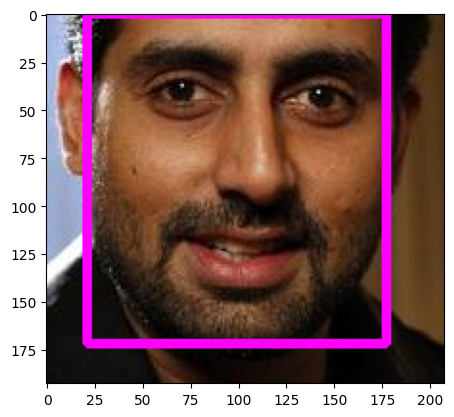

In [47]:
image=cv2.imread(OriginalImages[1])
x,y,w,h=results[1][0]['box']
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
plt.imshow(image)

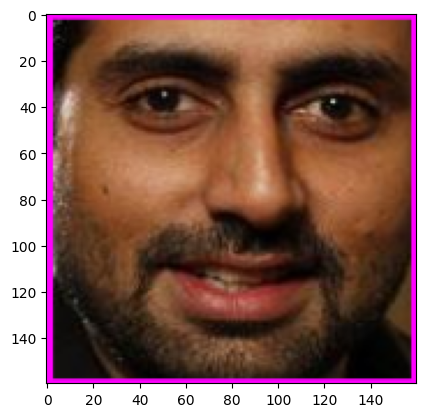

In [48]:
cropped=image[y:y+h,x:x+w]
#facenet takes in 160x160
cropped=cv2.resize(cropped,(160,160))
plt.imshow(cropped)

In [49]:
cropped

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [224,   7, 214],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [ 25,   5,  20],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [229,   1, 229],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

#automating the preprocessing

In [50]:
detector=MTCNN()

In [85]:
class Load_Face:
  def __init__(self,directory):
    #x:stores all images, y:stores all labels
    self.directory=directory
    self.size=(160,160)
    self.x=[]
    self.y=[]
    self.detector=MTCNN()

  def extract_face(self,file):
    image=cv2.imread(file)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y,w,h=self.detector.detect_faces(image)[0]['box']
    x,y=abs(x),abs(y)
    cropped_face=image[y:y+h,x:x+w]
    face_array=cv2.resize(cropped_face,self.size)
    return face_array
  
  def load_faces(self,dir):
    faces=[]
    for img_name in os.listdir(dir):
      try:
        path=dir+img_name
        single_face=self.extract_face(path)
        faces.append(single_face)
      except Exception as e:
        pass
      return faces 
  
  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
            path=self.directory +'/'+ sub_dir+'/'
            faces=self.load_faces(path)
            labels=[sub_dir for _ in range(len(faces))]
            print(f"Loaded successfully: {len(labels)}")
            self.x.extend(faces)
            self.y.extend(labels)
        
    return np.asarray(self.x), np.asarray(self.y)


In [88]:
face_loading=Load_Face('/content/drive/MyDrive/dataset')
x,y=face_loading.load_classes()

1/1 [==============================] - 0s 172ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 30ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 25ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 29ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 34ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 25ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 31ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 24ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 53ms/step
Loaded successfully: 1
1/1 [===================

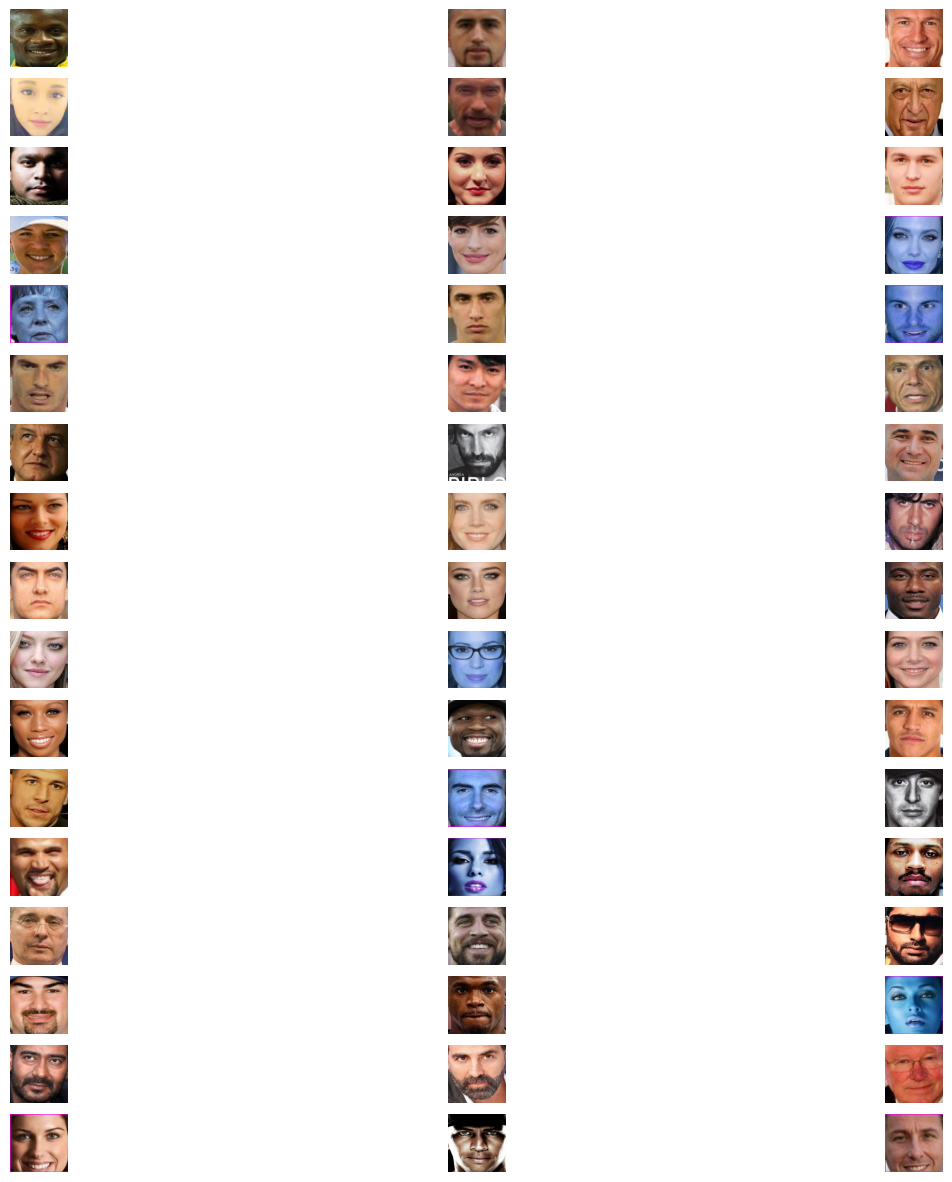

In [87]:
plt.figure(figsize=(16,16))
for num,image in enumerate(x):
    ncols=3
    nrows=len(y)//ncols+1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

#facenet part

In [54]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=f8bb572ece67fef72033c59a4eecffe26dffc9ea8333812ff3dff81518f2f528
  Stored in directory: /root/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet


In [64]:
from keras_facenet import FaceNet
embedder=FaceNet()

In [65]:
def extract_embedding(face_img):
  face_img=face_img.astype('float32') #3d, 160x160x3
  face_img=np.expand_dims(face_img,axis=0) #facenet image is 3d, we need 4d (None*160*160*3)
  yhat=embedder.embeddings(face_img)
  return yhat[0] #512D image (1x1x512)

In [66]:
embedded_x=[]
for img in x:
  embedded_x.append(extract_embedding(img))
embedded_x=np.asarray(embedded_x) 

1/1 [==============================] - 0s 100ms/step


In [67]:
np.savez_compressed('face_embedding.npz',embedded_x,y) #provides storage of array data using gzip compression

#svm model

In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)

In [90]:
len(embedded_x)

51

In [91]:
len(y)

51

In [92]:
y

array([50, 49, 47, 45, 48, 46, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 19,  0, 16,  1,
        4, 11, 12, 17, 18, 20,  2,  3,  6,  7,  8,  9, 10, 13, 14, 15,  5])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(embedded_x,y,shuffle=True,random_state=17)

In [95]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [96]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

1.0

In [98]:
accuracy_score(y_test,y_predict_test)

0.0

Text(0, 0.5, '50')

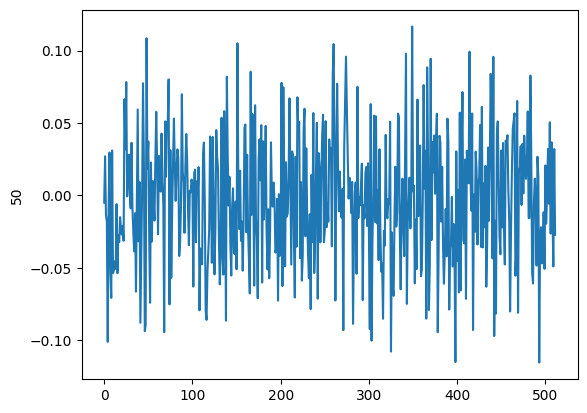

In [99]:
plt.plot(embedded_x[0]) 
plt.ylabel(y[0])

In [100]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)